In [3]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

### Ensemble

- 여러 모델을 연결하여 강력한 모델을 만드는 것
- 종류
    - Voting : 다양한 모델의 결과값을 투표로 하나의 값으로 산출
        - Hard Voting, Soft Voting
    - Bagging : 한 종류의 모델을 여러번 시도 후 평균
        - Random Forest
    - Boosting : 하나의 모델의 오차를 줄여나가는 방식
        - GB, LGB, XGB, AB
    
### Random Forest

> - **Decision Tree를 여러개** 만들어 **하나의 모델**을 만드는 방식
- **다른 방향으로 과대적합된 트리**를 만들어 **평균을 내어 과대적합을 줄임**
- 두 가지 방법이 존재
    - 트리를 생성 할 때 사용하는 데이터를 무작위 선택
    - 트리를 생성 할 때 사용하는 feature를 무작위 선택
- 주 파라미터
    - n_estimators : 생성할 트리 갯수 설정
    - max_feature : 선택할 feature 갯수 설정

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

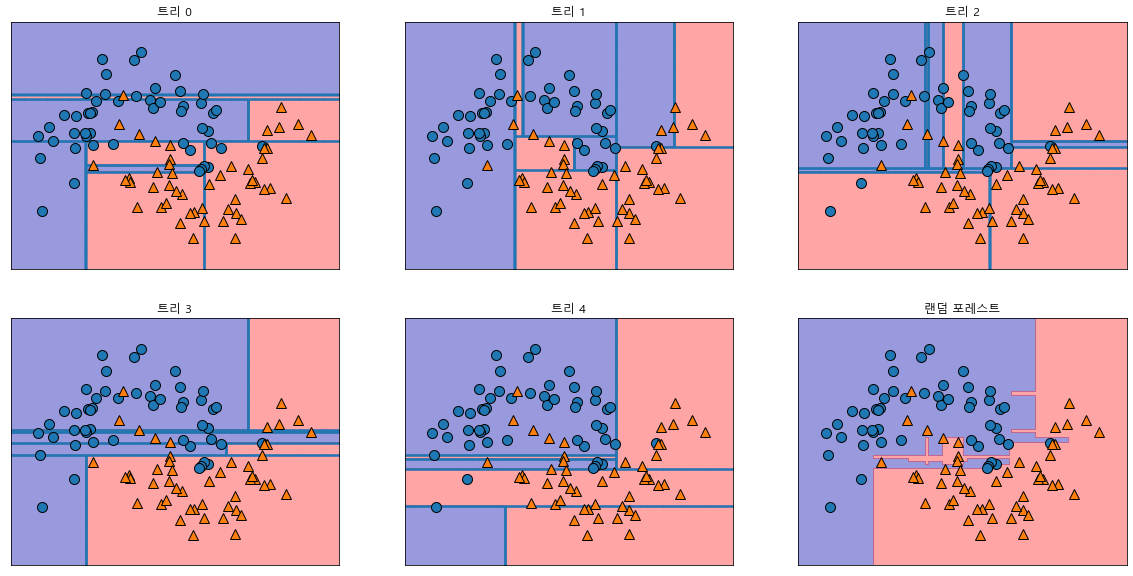

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### 장단점

#### 장점

> - 성능이 매우 뛰어나고 파라미터 튜닝을 하지 않아도 효과적으로 작동
- 데이터의 스케일을 맞출 필요 없다.

#### 단점

> - 트리의 갯수가 많다면 시간이 느려진다. => n_jobs를 이용해 cpu 갯수 지정(n_jobs = -1일경우 cpu의 모든 코어를 사용해 병렬처리)
- random_state값에 따라 모델이 달라진다.
- feature가 많고 희소한 데이터에는 잘 작동하지 않는다.

### Gradient Boosting

- 분류와 회귀 모두 사용 가능
- 랜덤 포레스트와의 차이점은 무작위성이 없고 **이전 트리의 오차를 보완하는 방식**
- **강력한 사전 가지치기를 사용**
- 여러개의 **약한 학습기(weak learner)**를 사용해 메모리를 적개 사용하고 예측도 빠르다.
- 파라미터 설정에 대해 조금 민감하지만 잘 조정하면 랜덤포레스트보다 더 좋은 정확도를 제공한다.
- 주 매개변수
    - n_estimators : 트리 갯수
    - learning_rate : 오차를 얼마나 보정할지

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [9]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


훈련 세트 정확도가 100%로 과대적합 되었다고 판단해 max_depth, learning_rate 값을 변경했다.

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

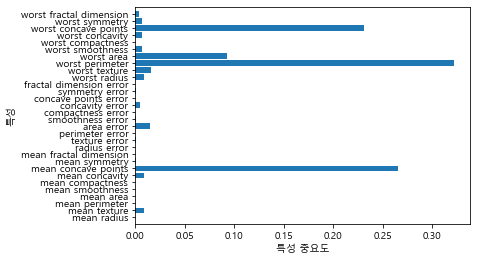

In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- **보통은 안정적인 `랜덤포레스트`를 먼저 사용**
- **추후 프로세스 시간 또는 정확도를 조금이라도 올리기 위해서 `그래디언트 부스팅`을 사용**하면 된다.


### 장단점

#### 장점

> - 지도 학습에서 강력하고 널리 사용되는 모델 중 하나
- 다른 트리 기반 모델처럼 특성의 스케일 조정하지 않아도 된다.

#### 단점

> - 매개변수에 너무 민감
- 훈련 시간이 꽤 길다.
- 희소하거나 고차원 데이터에 잘 작동하지 않음